Домашнее задание. 

Условие: Задача состоит в модификации кода градиентного спуска для задачи регрессии (ноутбук лекции - Gradient_descent.ipynb). Необходимо, чтобы ваш градиентный спуск мог решать задачи классификации, а именно линейной классификации и логистической регрессии.
На всякий случай напомню, что код будет разный, поэтому жду от вас две функции градиентного спуска.
Чтобы решить задачи, обратите внимание на пункт “Принцип максимального правдоподобия” статьи http://www.machinelearning.ru/wiki/images/6/68/voron-ML-Lin.pdf . Там находится ответ на вопрос “какая функция потерь”.

**Дополнительная информация**

Привет, Владимир!
Спасибо за проделанную работу.
К сожалению, ты неверно определил лосс-функцию и градиент. Предлагаю посмотреть на эту статью https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/ .
Там всё очень доступно, и даже явно написан logloss и градиент. Необходимо найти и грамотно применить.
Жду правок. Желаю успеха в обучении :)

**Ответ**

Привет, Артур. Действительно, я использовал другую лосс-функцию. 
Идея заключалась в том, что бы минимизировать ту же самую функцию ошибки, которую мы использовали для регрессии, то есть
$$\sum_{i=0}^N(y_n - a_n)^2$$
, где **a** - это наша гипотеза-сигмоид. Логично ведь, хоть и получено не путем "логарифмирования правдоподобия". 
И если эту функцию продифференцировать по тетте, то получается как раз  
$$x*a'*(y-a)$$ 
А в векторной форме это, соответственно, будет:

**gradient = np.dot(x_transpose, (loss * sigmoid_der(z)))**

И это работало. 

Ну да ладно. Переделал под logloss. Полезно знать, какую функцию люди обычно тут используют...
Статья все равно тяжелая. Непрактичная.

In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_classification
import pylab
from scipy import stats

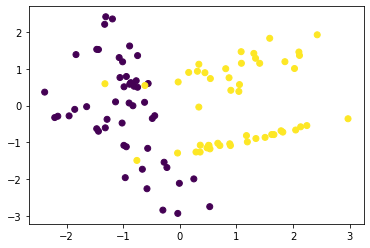

In [2]:
# генерируем случайные данные
x, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
m, n = np.shape(x)
x = np.c_[ np.ones(m), x]
# посмотрим что получилось
pylab.scatter(x[:,1], x[:,2], c=y)
pylab.show()

### Сначала вручную

In [3]:
# шаг алгоритма
alpha = 0.01

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def logloss(hypothesis, y):
    return -y*np.log(hypothesis) - (1 - y)*np.log(1 - hypothesis)


In [5]:
def gradient_descent_classification(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.array([0.5, 0.6, 0.7]) # ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        z = np.dot(x, theta) # матричное произведение
        
        hypothesis = sigmoid(z) 
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        print( f'logloss: {sum(logloss(hypothesis, y))}')
        
        gradient = np.dot(x_transpose, loss) / m         
        
        theta = theta - alpha * gradient  # update
    
    return theta

In [6]:
%%time
theta = gradient_descent_classification(alpha, x, y, 1000)
theta

logloss: 52.92530055890045
logloss: 52.785786538905285
logloss: 52.64709890140785
logloss: 52.50923258957254
logloss: 52.37218257051491
logloss: 52.23594383531137
logloss: 52.100511399007196
logloss: 51.96588030062172
logloss: 51.83204560315181
logloss: 51.69900239357278
logloss: 51.56674578283768
logloss: 51.43527090587374
logloss: 51.30457292157764
logloss: 51.17464701280814
logloss: 51.04548838637716
logloss: 50.91709227303846
logloss: 50.78945392747504
logloss: 50.66256862828415
logloss: 50.53643167796095
logloss: 50.41103840287982
logloss: 50.286384153274554
logloss: 50.162464303216424
logloss: 50.039274250590715
logloss: 49.91680941707152
logloss: 49.79506524809509
logloss: 49.67403721283143
logloss: 49.5537208041545
logloss: 49.434111538610644
logloss: 49.31520495638581
logloss: 49.19699662127124
logloss: 49.07948212062735
logloss: 48.962657065347
logloss: 48.8465170898165
logloss: 48.73105785187574
logloss: 48.616275032777146
logloss: 48.50216433714278
logloss: 48.3887214929206

logloss: 28.972125824741518
logloss: 28.956114138118817
logloss: 28.940153113855416
logloss: 28.924242510709657
logloss: 28.90838208889437
logloss: 28.892571610066724
logloss: 28.876810837318082
logloss: 28.86109953516392
logloss: 28.845437469533984
logloss: 28.829824407762306
logloss: 28.81426011857751
logloss: 28.798744372092955
logloss: 28.78327693979717
logloss: 28.76785759454431
logloss: 28.752486110544538
logloss: 28.737162263354673
logloss: 28.72188582986886
logloss: 28.70665658830919
logloss: 28.691474318216542
logloss: 28.676338800441417
logloss: 28.661249817134927
logloss: 28.646207151739656
logloss: 28.63121058898086
logloss: 28.61625991485754
logloss: 28.60135491663361
logloss: 28.586495382829206
logloss: 28.57168110321202
logloss: 28.556911868788646
logloss: 28.542187471796172
logloss: 28.527507705693544
logloss: 28.51287236515326
logloss: 28.498281246053015
logloss: 28.483734145467427
logloss: 28.469230861659792
logloss: 28.454771194073935
logloss: 28.44035494332618
loglo

logloss: 25.03466160354983
logloss: 25.028530022229454
logloss: 25.02240970387157
logloss: 25.01630061518716
logloss: 25.010202723020853
logloss: 25.004115994350304
logloss: 24.998040396285575
logloss: 24.991975896068354
logloss: 24.98592246107146
logloss: 24.97988005879805
logloss: 24.973848656881053
logloss: 24.967828223082517
logloss: 24.961818725292957
logloss: 24.955820131530754
logloss: 24.949832409941433
logloss: 24.94385552879713
logloss: 24.93788945649595
logloss: 24.931934161561298
logloss: 24.92598961264132
logloss: 24.92005577850826
logloss: 24.91413262805784
logloss: 24.908220130308706
logloss: 24.9023182544017
logloss: 24.896426969599492
logloss: 24.890546245285684
logloss: 24.8846760509645
logloss: 24.878816356259986
logloss: 24.872967130915576
logloss: 24.867128344793386
logloss: 24.861299967873748
logloss: 24.855481970254527
logloss: 24.849674322150655
logloss: 24.843876993893424
logloss: 24.838089955930094
logloss: 24.832313178823213
logloss: 24.826546633250054
loglos

array([0.22574286, 2.00422703, 0.3290508 ])

$$x_1w_1 + x_2w_2 + w_0 = 0$$

$$x_2 = -\frac{x_1w_1 + w_0}{w_2}$$

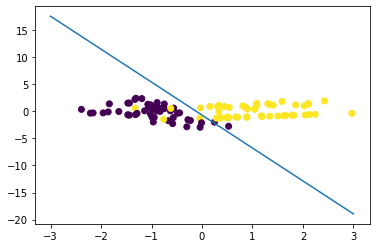

[17.586762553329297, -18.958847714695573]

In [7]:
x_points = [-3, 3]
y_points = []
for x_point in x_points:
    y_point = -(theta[0] + (theta[1]*x_point))/theta[2]
    y_points.append(y_point)

pylab.plot(x_points, y_points)
pylab.scatter(x[:,1], x[:,2], c=y)
pylab.show()
y_points

### Используем готовые методы

In [8]:
from sklearn import linear_model

In [9]:
model = linear_model.SGDClassifier( alpha = 0.01, max_iter = 1000 )

In [10]:
x = x[:,1:]

In [11]:
%%time 

model.fit( x, y )

Wall time: 0 ns


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
model.intercept_, model.coef_

(array([0.33171573]), array([[2.28049007, 0.45476562]]))

In [13]:
y_predict_sgd = model.predict( x )

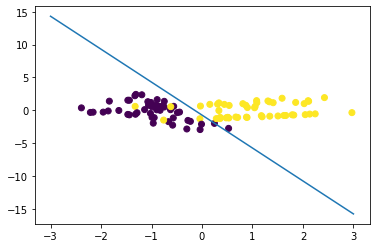

In [14]:
x_points = [-3, 3]
y_points = []
for x_point in x_points:
    y_point = -(model.intercept_ + (model.coef_[0][0]*x_point))/model.coef_[0][1]
    y_points.append(y_point)

pylab.plot(x_points, y_points)
pylab.scatter(x[:,0], x[:,1], c=y)
pylab.show()